## Model Building & Evaluation Notebook for Recursive Feature Elimination Approach to Dimensionality Reduction

In [1]:
# Import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
# Import data from previous notebook

X_train = pd.read_csv('Mod_3_X_train_RFE.csv')
X_test = pd.read_csv('Mod_3_X_test_RFE.csv')
Y_train = pd.read_csv('Mod_3_Y_train_RFE.csv')
Y_test = pd.read_csv('Mod_3_Y_test_RFE.csv')

In [3]:
print('Y_train Information\n')
Y_train.info()
print('\n\nY_test Information\n')
Y_test.info()

Y_train Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125919 entries, 0 to 125918
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   readmitted  125919 non-null  object
dtypes: object(1)
memory usage: 983.9+ KB


Y_test Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19869 entries, 0 to 19868
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   readmitted  19869 non-null  object
dtypes: object(1)
memory usage: 155.4+ KB


In [4]:
# Change Y data to categorical
Y_train = Y_train.astype('category')
Y_test = Y_test.astype('category')

In [5]:
# Verify changes were made correctly
print('Y_train Information\n')
Y_train.info()
print('\n\nY_test Information\n')
Y_test.info()

Y_train Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125919 entries, 0 to 125918
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   readmitted  125919 non-null  category
dtypes: category(1)
memory usage: 123.2 KB


Y_test Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19869 entries, 0 to 19868
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   readmitted  19869 non-null  category
dtypes: category(1)
memory usage: 19.7 KB


## Model 1 - KNN

In [6]:
# Instantiate the K-Nearest Neighbors classifier with 5 neighbors
KNN = KNeighborsClassifier(n_neighbors = 5)

# Using the KNN classifier on the training data
KNN.fit(X_train, Y_train)

C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [7]:
# Use the KNN classifier to make predictions
# Start timer
start_time = time.time()

# Making predictions using KNN classifier
Y_predict_KNN = KNN.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 1.2986783981323242 seconds


In [8]:
# Printing actuals and predictions
#print('Actuals:\t\t', list(Y_test))
#print('Predictions with KNN model: \t\t', list(Y_predict_KNN))

## KNN Confusion Matrix and Model Evaluation

In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_KNN)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[ 831  794  614]
 [2279 2643 2154]
 [2826 3204 4524]]


In [10]:
print(Y_train.value_counts())
print(Y_test.value_counts())

readmitted
<30           41973
>30           41973
NO            41973
Name: count, dtype: int64
readmitted
NO            10554
>30            7076
<30            2239
Name: count, dtype: int64


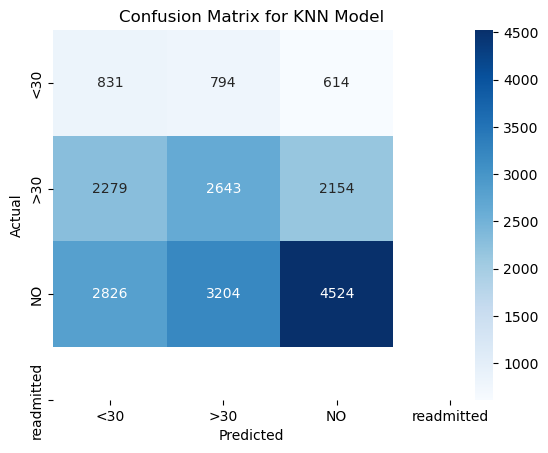

In [11]:
# Define classes

classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_KNN]

# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_KNN)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [12]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_KNN, average = 'weighted')
recall = recall_score(Y_test, Y_predict_KNN, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_KNN)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.4871
Recall: 0.4025
Accuracy: 0.4025


In [13]:
print(classification_report(Y_test, Y_predict_KNN, target_names=['<30', '>30', 'NO']))

              precision    recall  f1-score   support

         <30       0.14      0.37      0.20      2239
         >30       0.40      0.37      0.39      7076
          NO       0.62      0.43      0.51     10554

    accuracy                           0.40     19869
   macro avg       0.39      0.39      0.37     19869
weighted avg       0.49      0.40      0.43     19869



## Model 2 - Decision Tree

In [14]:
# Instantiate the decision tree classifier
DecisionTree = DecisionTreeClassifier(random_state = 53)

# Train the model
DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=53)

In [15]:
# Use the decision tree classifier to make predictions

# Start timer
start_time = time.time()

# Making predictions using decision tree classifier
Y_predict_tree = DecisionTree.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.00699305534362793 seconds


## Decision Tree Confusion Matrix and Model Evaluation

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_tree)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[ 397  859  983]
 [1160 2710 3206]
 [1285 3505 5764]]


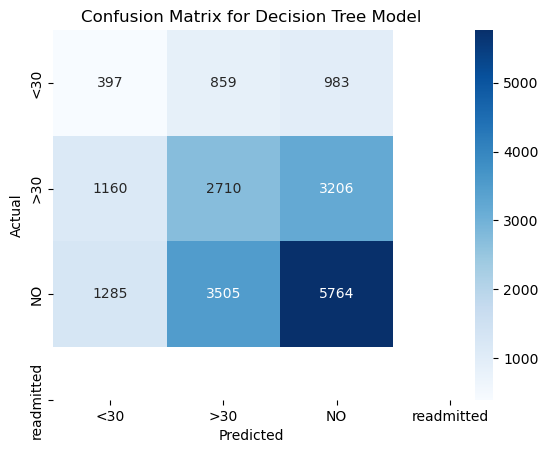

In [17]:
# Define classes

classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_tree]

# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_tree)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [18]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_tree, average = 'weighted')
recall = recall_score(Y_test, Y_predict_tree, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_tree)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.4598
Recall: 0.4465
Accuracy: 0.4465


In [19]:
print(classification_report(Y_test, Y_predict_tree, target_names=['<30', '>30', 'NO']))

              precision    recall  f1-score   support

         <30       0.14      0.18      0.16      2239
         >30       0.38      0.38      0.38      7076
          NO       0.58      0.55      0.56     10554

    accuracy                           0.45     19869
   macro avg       0.37      0.37      0.37     19869
weighted avg       0.46      0.45      0.45     19869



## Model 3 - Random Forest Classifier

In [20]:
# Instantiate the random forest classifier
RandomForest = RandomForestClassifier(n_estimators = 100, random_state = 53)

# Start timer
start_time = time.time()

# Train the model
RandomForest.fit(X_train, Y_train)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Time taken: 25.926504850387573 seconds


In [21]:
# Use the random forest classifier to make predictions

# Start timer
start_time = time.time()

# Making predictions using random forest classifier
Y_predict_RF = RandomForest.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.454265832901001 seconds


## Random Forest Confusion Matrix and Model Evaluation

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_RF)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[ 206  938 1095]
 [ 443 2975 3658]
 [ 398 2761 7395]]


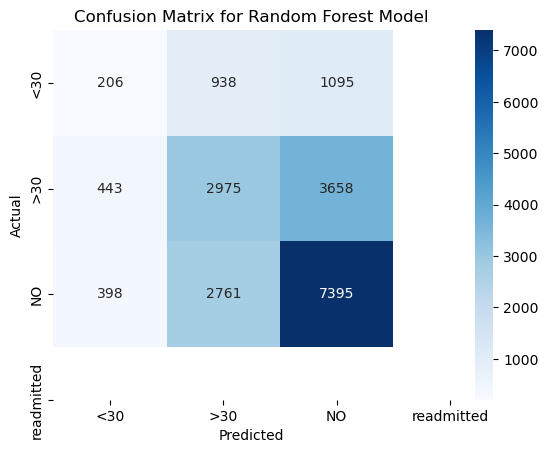

In [23]:
# Define classes

classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_RF]

# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_RF)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [24]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_RF, average = 'weighted')
recall = recall_score(Y_test, Y_predict_RF, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_RF)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.5043
Recall: 0.5323
Accuracy: 0.5323


In [25]:
print(classification_report(Y_test, Y_predict_RF, target_names=['<30', '>30', 'NO']))

              precision    recall  f1-score   support

         <30       0.20      0.09      0.13      2239
         >30       0.45      0.42      0.43      7076
          NO       0.61      0.70      0.65     10554

    accuracy                           0.53     19869
   macro avg       0.42      0.40      0.40     19869
weighted avg       0.50      0.53      0.51     19869



## Model 4 - Naive Bayes

In [26]:
# Instantiate the Naive Bayes classifier
NB = GaussianNB()

# Start timer
start_time = time.time()

# Train the model
NB.fit(X_train, Y_train)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.11413812637329102 seconds


C:\Users\Ingli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Use the random forest classifier to make predictions

# Start timer
start_time = time.time()

# Making predictions using random forest classifier
Y_predict_NB = NB.predict(X_test)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 0.008810043334960938 seconds


## Naive Bayes Confusion Matrix and Model Evaluation

In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_NB)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[ 769  304 1166]
 [1880 1122 4074]
 [1623  946 7985]]


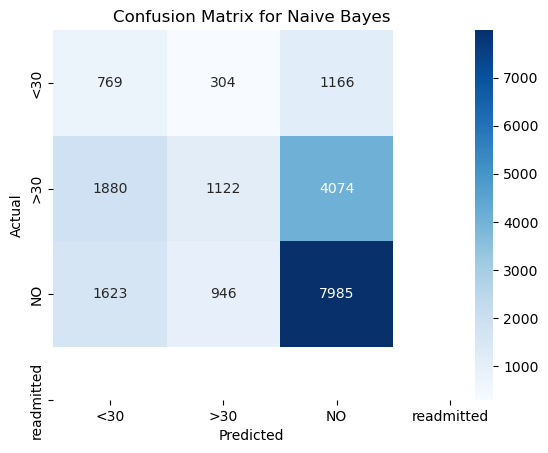

In [29]:
# Define classes

classes = ['<30', '>30', 'NO', 'readmitted']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_NB]

# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_NB)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [30]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_NB, average = 'weighted')
recall = recall_score(Y_test, Y_predict_NB, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_NB)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.5095
Recall: 0.4971
Accuracy: 0.4971


In [31]:
print(classification_report(Y_test, Y_predict_NB, target_names=['<30', '>30', 'NO']))

              precision    recall  f1-score   support

         <30       0.18      0.34      0.24      2239
         >30       0.47      0.16      0.24      7076
          NO       0.60      0.76      0.67     10554

    accuracy                           0.50     19869
   macro avg       0.42      0.42      0.38     19869
weighted avg       0.51      0.50      0.47     19869

